# Data Wrangling

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# load the dataset
df = pd.read_csv('C:/Users/solace.dark/Documents/Jupyter Notebook/Practical Projects/Customer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df.drop('customerID', axis=1)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
#check for duplication
df.duplicated().sum()

22

In [5]:
#analyze characteristics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
#change TotalCharges feature to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#confirm dtype is now numeric
assert all(isinstance(val, float) for val in df['TotalCharges']), 'Make sure TotalCharges column is of type float'

In [7]:
#check for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#check percentage of missingness for TotalCharges feature
missing_pct = np.round((df['TotalCharges'].isnull().sum() / len(df['TotalCharges'])) * 100, 1)

print(f'{missing_pct}% of the TotalCharges column is missing.')

0.2% of the TotalCharges column is missing.


In [9]:
#fill missing values in TotalCharges feature by multiplying tenure and MonthlyCharges features
df['TotalCharges'] = df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'])

#check if missing data points are still filled
assert df['TotalCharges'].isnull().sum() == 0, 'Fill in TotalCharges missng values before continuing.'

In [10]:
#convert SeniorCitizen feature to type object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('str').replace({'0': 'No', '1':'Yes'})
df['SeniorCitizen'] = df['SeniorCitizen'].replace({'0': 'No', '1':'Yes'})

#confirm if SeniorCitizan type is changed to object
assert all(isinstance(val, str) for val in df['SeniorCitizen']), 'SeniorCitizen column is not of type string.'

In [11]:
#check cardinality of the category features
df.select_dtypes('object').nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [12]:
#check unique values in category features
category_feat = df.select_dtypes('object').columns.to_list()
for col in category_feat:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: ['No' 'Yes']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [13]:
#In MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies
# variables 'No' and 'No internet service' are used repeatedly although they mean the same thing.
# merging 'No' and 'No internet service' for these features
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
columns_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'] 

for col in columns_to_replace:
    df[col] = df[col].replace('No internet service', 'No')

In [14]:
#perform descriptive statistics on numeric features
num_col_summary = df.select_dtypes('number').describe()
num_col_summary

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

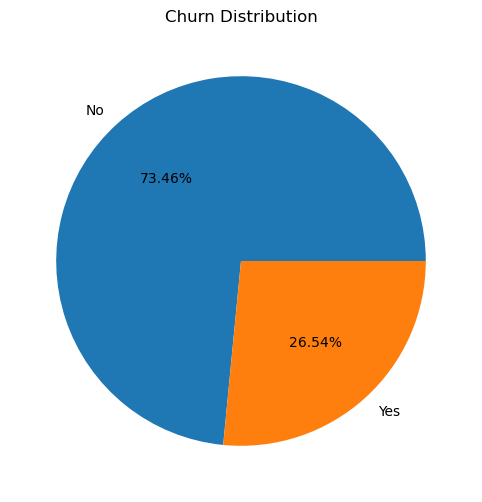

Within the last month, 73.46% of customers continue to use the telecom services. 26.54% of customers churned.


In [15]:
#visualize percentage of churned customers
plt.figure(figsize=(10, 6))
plt.pie(df['Churn'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('Churn Distribution')
plt.show()

#return percentage of churned customers
churn_pct = round((df['Churn'].value_counts()['Yes'] / len(df['Churn'])) * 100, 2)
no_churn_pct = round((df['Churn'].value_counts()['No'] / len(df['Churn'])) * 100, 2)
print(f'''Within the last month, {no_churn_pct}% of customers continue to use the telecom services. {churn_pct}% of customers churned.''')

The numeric features appear to have no outliers

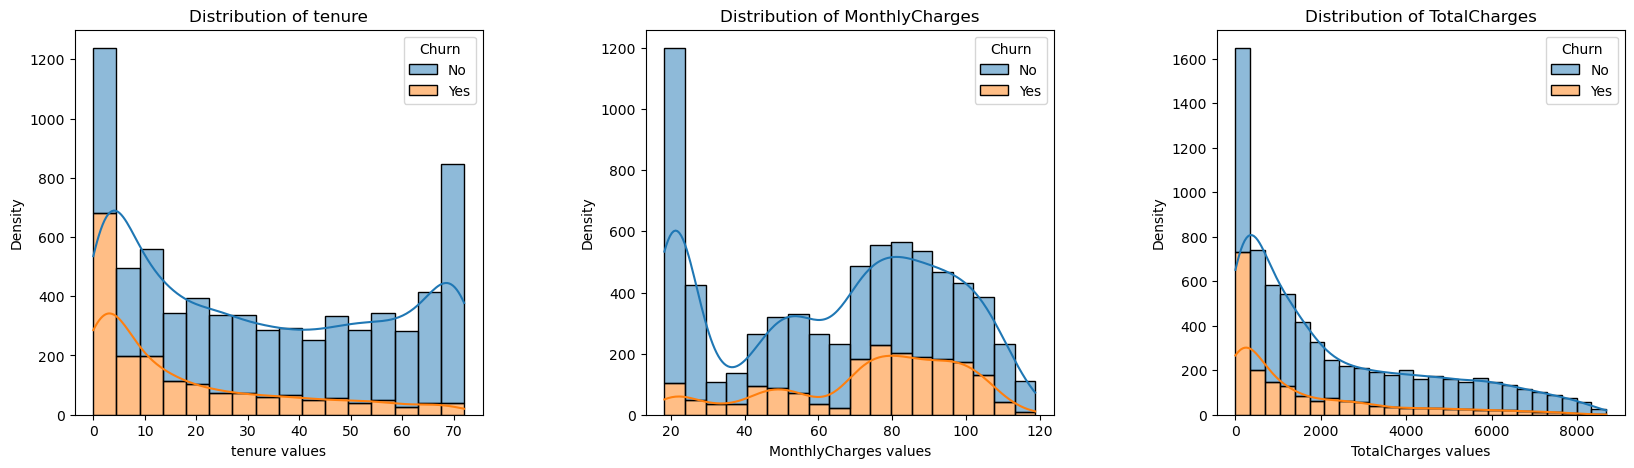

In [38]:
# Suppress the specific FutureWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

#get numeric features
numeric_feat = df.select_dtypes('number').columns.to_list()

#analyze distribution of the numeric features and their relationships with the label using histogram
num_subplots = len(numeric_feat)
fig, ax = plt.subplots(nrows=1, ncols=num_subplots, figsize=(20, 5))
fig.subplots_adjust(hspace=.4, wspace=.4)

for i, col in enumerate(numeric_feat):
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(f'{col} values')
    ax[i].set_ylabel(f'Density')

plt.show()

The Distribution of tenure appears to have a fair distribution
Majority of the customers have been with the telco company for at most 20 months and the churn count is highest for  these customers. In addition, customers who have stayed with the telco for over 20 months have the lowest churn count. This indicates new customers are more likely to churn than old customers.

The Distribution of MonthlyCharges
Majority of the customers pay between 20 to 60 monthly. However, customers who pay between 70 to 100 are most likely to churn, followed by customers who pay 20 or less, just as much likely as customers who pay between 40 and 60.

The Distribution of TotalCharges
Majority of the customers pay 2000 or less in total charges. Customers paying a total charge in this range are more likely to churn. It appears the more a customers pays in total charges, the less likely they are to churn.

Therefore newer customers and customers who pay less than 2000 in total charges are the most likely to churn

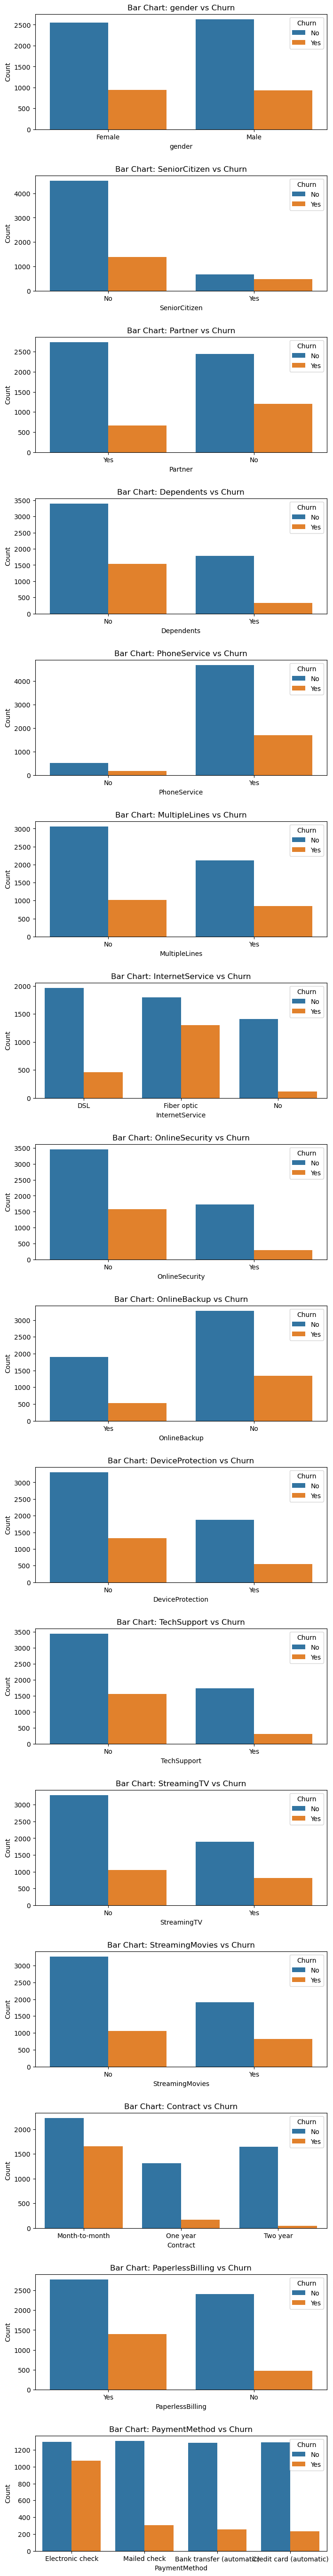

In [40]:
#remove the label(Churn) from the list of category features
category_feat = df.select_dtypes('object').columns.to_list()
del category_feat[-1]
num_subplots = len(category_feat)

#analyze distribution of category features and their relationships with the label using bar chart
fig, ax = plt.subplots(nrows=num_subplots, ncols=1, figsize=(8, 70))
fig.subplots_adjust(hspace=.4)

for i, col in enumerate(category_feat):
    #barchart for features
    sns.countplot(data=df, x=col, hue='Churn', ax=ax[i])
    ax[i].set_title(f'Bar Chart: {col} vs Churn')
    ax[i].set_xlabel(f'{col}')
    ax[i].set_ylabel('Count')

plt.show()

In [23]:
#churn probabilities for category features
label  = df['Churn'].name

for col in category_feat:
    churn_probabilities = df.groupby(col)[label].value_counts(normalize=True) * 100
    print(f'Churn Probabilities of {col}:')
    for category_value in df[col].unique():
        churn_rate = churn_probabilities[category_value]['Yes'] if 'Yes' in churn_probabilities[category_value].index else 0
        print(f'A {category_value} customer has a churn probability of {round(churn_rate, 2)}%')
        print()

Churn Probabilities of gender:
A Female customer has a churn probability of 26.92%

A Male customer has a churn probability of 26.16%

Churn Probabilities of SeniorCitizen:
A No customer has a churn probability of 23.61%

A Yes customer has a churn probability of 41.68%

Churn Probabilities of Partner:
A Yes customer has a churn probability of 19.66%

A No customer has a churn probability of 32.96%

Churn Probabilities of Dependents:
A No customer has a churn probability of 31.28%

A Yes customer has a churn probability of 15.45%

Churn Probabilities of PhoneService:
A No customer has a churn probability of 24.93%

A Yes customer has a churn probability of 26.71%

Churn Probabilities of MultipleLines:
A No phone service customer has a churn probability of 24.93%

A No customer has a churn probability of 25.04%

A Yes customer has a churn probability of 28.61%

Churn Probabilities of InternetService:
A DSL customer has a churn probability of 18.96%

A Fiber optic customer has a churn pr